In [2]:
import pandas as pd
df_audio = pd.read_pickle('audio_data.pkl')
df_text = pd.read_pickle('text_data.pkl')

In [3]:
import keras
from keras.preprocessing import image
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import preprocess_input
import numpy as np


Using TensorFlow backend.
/home/rishabh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rishabh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rishabh/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rishabh/.local/lib/python3.6/site-packages/tensorflow/py

In [4]:

# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [10]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('/home/rishabh/Desktop/project/images_glodd/images/eye_glasses/eye_glasses_1/eye_glasses_1_11.png', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
#print(label)
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

[[('n04447861', 'toilet_seat', 0.09415509), ('n03899768', 'patio', 0.0643547), ('n03657121', 'lens_cap', 0.057772715), ('n04049303', 'rain_barrel', 0.029861191), ('n04553703', 'washbasin', 0.026455333)]]
toilet_seat (9.42%)


In [6]:

im = load_img('/home/rishabh/Desktop/project/images_glodd/images/eye_glasses/eye_glasses_1/eye_glasses_1_11.png')
width, height = im.size   # Get dimensions
print(width,height)
new_width=224
new_height=224
left = (width - new_width)/2
top = (height - new_height+150)/2
right = (width + new_width)/2
bottom = (height + new_height+150)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))
print(im.size)

640 810
(224, 224)


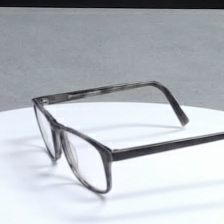

In [7]:
im


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
640 810



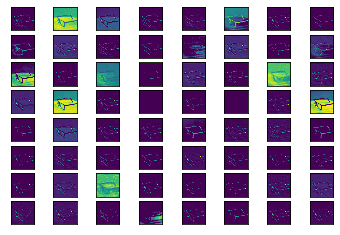

In [8]:
##### plot feature map of fir conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
#img = load_img('medicine_bottle_1_1.png', target_size=(224, 224))

img = load_img('/home/rishabh/Desktop/project/images_glodd/images/eye_glasses/eye_glasses_1/eye_glasses_1_11.png')
width, height = img.size   # Get dimensions
print(width,height)
new_width=224
new_height=224
left = (width - new_width)/2
top = (height - new_height+150)/2
right = (width + new_width)/2
bottom = (height + new_height+150)/2

# Crop the center of the image
img = img.crop((left, top, right, bottom))
#img.show()
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [10]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    # convert the image to an array
    img = img_to_array(img)
    # expand dimensions so that it represents a single 'sample'
    img = expand_dims(img, axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = model.predict(img)
    return feature_maps

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [19]:
from os import walk
 
def features(directory, extension):
    for (dirpath, dirnames, filenames) in walk(directory):
        for file in filenames:
            file_path = dirpath+'/'+file
            #print(dirpath+'/'+file)
            feature = extract_features(file_path)
            #name = file_path.split('/')
            #print(feature[0])
                #np.savetxt('features/'+file+'.csv', feature[0], delimiter=',', fmt='%d')
            np.save('features_crop/'+file.split('.')[0], feature[0])

In [20]:
features('/home/rishabh/Desktop/project/images_glodd/images','png')